# ROC Curves & AUC metrics
Here we use the `roc_curve` and `auc` faciities in scikit learn to plot some AUC curves.  
- For `GaussianNB` and `KNeighborsClassifier` we use the `predict_proba` method to get scores that can be ranked.  

In [18]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

The target is binary but represented as a category variable (`tested_positive`, `tested_negative`).  
We add a column called `target` with 1,0 targets. 

In [7]:
diDF = pd.read_csv('data/diabetes.csv')
diDF['target'] = np.where(diDF['neg_pos'] == 'tested_positive', 1, 0)
diDF.head()

,preg,plas,pres,skin,insu,mass,pedi,age,neg_pos,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1


In [12]:
# uncomment two lines below if you didn't pop tose values yet
# diDF.pop('neg_pos').values 
# y = diDF.pop('target').values
X_raw = diDF.values
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)
X.shape, y.shape

((768, 8), (768,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)

In [20]:
gnb = GaussianNB()
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)
fprG, tprG, t = roc_curve(y_test, y_score[:,1])
roc_aucG = auc(fprG, tprG)

In [21]:
dtree = DecisionTreeClassifier(criterion='entropy') 
y_score = dtree.fit(X_train, y_train).predict_proba(X_test)
fprD, tprD, t = roc_curve(y_test, y_score[:,1])
roc_aucD = auc(fprD, tprD)

In [22]:
from sklearn.svm import SVC, LinearSVC
svm = SVC(kernel = 'linear',C=1, probability=True)
diabetes_SVM = svm.fit(X_train, y_train)
y_score = diabetes_SVM.decision_function(X_test)
fprS, tprS, t = roc_curve(y_test, y_score)
roc_aucS = auc(fprS, tprS)

## The ROC Plot

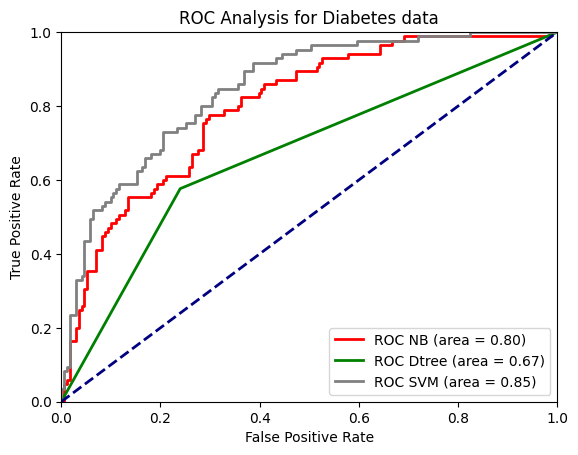

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fprG, tprG, color='red',
         lw=lw, label='ROC NB (area = %0.2f)' % roc_aucG)
plt.plot(fprD, tprD, color='green',
         lw=lw, label='ROC Dtree (area = %0.2f)' % roc_aucD)
plt.plot(fprS, tprS, color='grey',
         lw=lw, label='ROC SVM (area = %0.2f)' % roc_aucS)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis for Diabetes data')
plt.legend(loc="lower right")
plt.show()

In [25]:
# using syntetic data:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, class_sep=0.75, random_state=1)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)

In [27]:
gnb = GaussianNB()
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)
fprG, tprG, t = roc_curve(y_test, y_score[:,1])
roc_aucG = auc(fprG, tprG)

dtree = DecisionTreeClassifier(criterion='entropy') 
y_score = dtree.fit(X_train, y_train).predict_proba(X_test)
fprD, tprD, t = roc_curve(y_test, y_score[:,1])
roc_aucD = auc(fprD, tprD)

svm = SVC(kernel = 'linear',C=1, probability=True)
diabetes_SVM = svm.fit(X_train, y_train)
y_score = diabetes_SVM.decision_function(X_test)
fprS, tprS, t = roc_curve(y_test, y_score)
roc_aucS = auc(fprS, tprS)


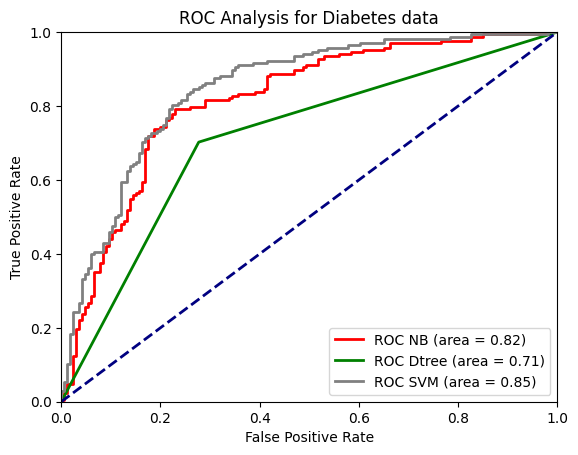

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fprG, tprG, color='red',
         lw=lw, label='ROC NB (area = %0.2f)' % roc_aucG)
plt.plot(fprD, tprD, color='green',
         lw=lw, label='ROC Dtree (area = %0.2f)' % roc_aucD)
plt.plot(fprS, tprS, color='grey',
         lw=lw, label='ROC SVM (area = %0.2f)' % roc_aucS)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis for Diabetes data')
plt.legend(loc="lower right")
plt.show()